In [53]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as nsn  
from sklearn.linear_model import LinearRegression

In [54]:
df = pd.read_csv("Pearson.txt")
df = df.drop_duplicates()
print(df.head())

  Father\tSon
0  65.0\t59.8
1  63.3\t63.2
2  65.0\t63.3
3  65.8\t62.8
4  61.1\t64.3


In [55]:
new = df['Father\tSon'].str.split('\t', expand = True)

In [56]:
new.columns = ['Fathers', 'Son']
new

,Fathers,Son
0,65.0,59.8
1,63.3,63.2
2,65.0,63.3
3,65.8,62.8
4,61.1,64.3
...,...,...
1072,67.7,59.8
1073,67.0,70.8
1075,71.8,69.3
1076,70.7,69.3


In [57]:
new_1 = new.copy().astype(float)

In [58]:
new_1['Result'] = new_1["Fathers"].div(new_1["Son"].values)
new_1

,Fathers,Son,Result
0,65.0,59.8,1.086957
1,63.3,63.2,1.001582
2,65.0,63.3,1.026856
3,65.8,62.8,1.047771
4,61.1,64.3,0.950233
...,...,...,...
1072,67.7,59.8,1.132107
1073,67.0,70.8,0.946328
1075,71.8,69.3,1.036075
1076,70.7,69.3,1.020202


In [59]:
new_1.isnull().sum()

Fathers    0
Son        0
Result     0
dtype: int64

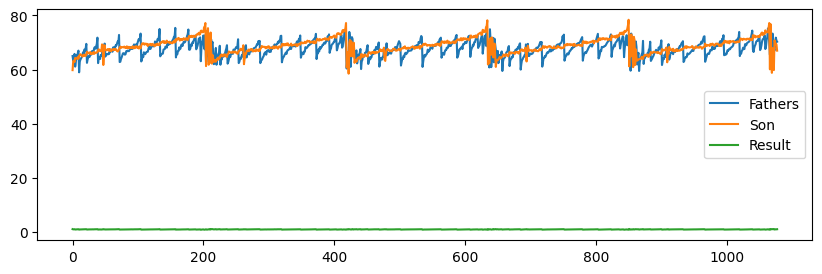

In [60]:
plt.figure(figsize=(10,3))
plt.plot(new_1)
plt.legend(['Fathers', 'Son','Result'], loc='right')

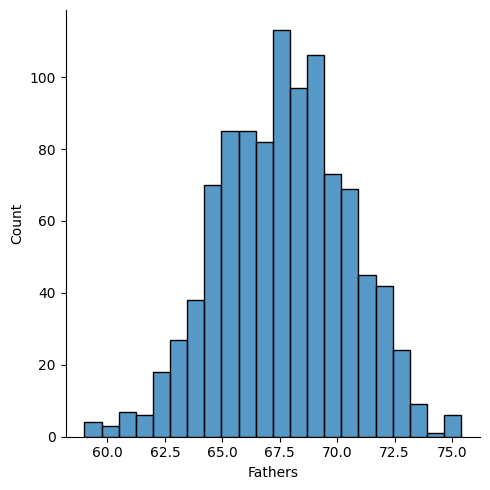

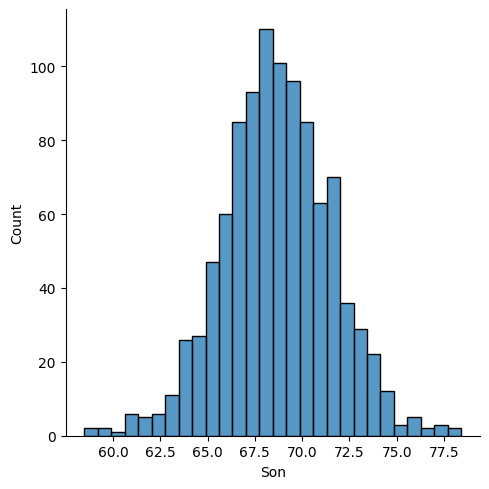

In [61]:
nsn.displot(new_1['Fathers'])
nsn.displot(new_1['Son'])

<function matplotlib.pyplot.show(close=None, block=None)>

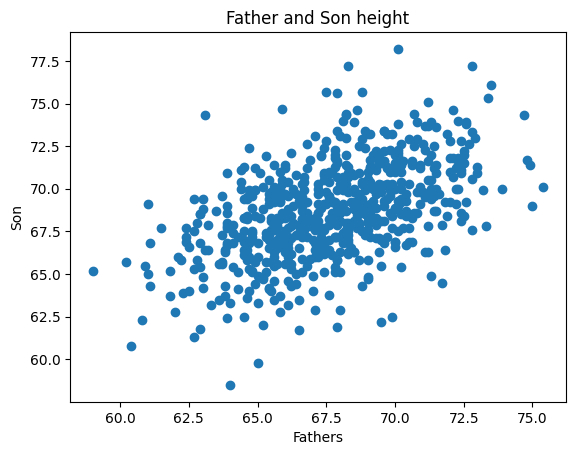

In [62]:
#visulize 
data = np.loadtxt('Pearson.txt', delimiter='\t', skiprows=1)

# num_points = int(len(data) *0.7)
# indices = np.random.choice(len(data), num_points, replace=False)
# data_70percent = data[indices]

num_samples = int(0.6 * len(data))
data = data[:num_samples]

fig, ax = plt.subplots()

ax.scatter (data[:,0], data[:,1])
ax.set_xlabel('Fathers')
ax.set_ylabel('Son')
ax.set_title('Father and Son height')

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

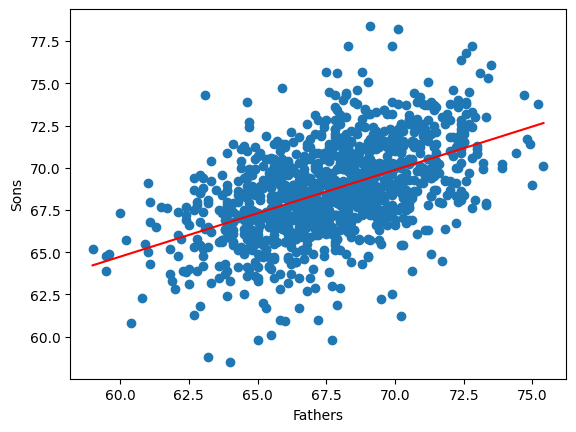

In [69]:
data = np.loadtxt('Pearson.txt', delimiter='\t', skiprows= 1)

num_samples = int(0.6 * len(data))
data = data[:num_samples]

x = data[:,0]
y = data[:,1]

slope = (np.mean(x*y) - np.mean(x)*np.mean(y)) / (np.mean(x**2) - np.mean(x)**2) 
intercept = np.mean(y) - slope*np.mean(x)

x0 = np.array([min(x), max(x)])
y0 = intercept + slope*x0

plt.scatter(x, y)
plt.plot(x0, y0, c='red')

plt.xlabel('Fathers')
plt.ylabel('Sons')

plt.show

In [75]:
x_new = np.array([70.7, 70.3])
y_pred = intercept + x_new*slope

print(y_pred)

[70.23301856 70.02741619]


In [77]:
# Prepare data
X = x[:, np.newaxis].reshape(-1, 1)
y = y[:, np.newaxis].reshape(-1, 1)

#Make model
model = LinearRegression()

#Traning data
model.fit(X, y)

#Predicting with new data
X_new = np.array([[70.7],[70.3]])
y_pred = model.predict(X_new)

print(y_pred[:,0])

[70.23301856 70.02741619]
